<a href="https://colab.research.google.com/github/Justabhi96/TF2.0/blob/master/4_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow==2.0.0-beta1
import tensorflow as tf

     |████████████████████████████████| 87.9MB 46kB/s 
     |████████████████████████████████| 3.1MB 56.2MB/s 
     |████████████████████████████████| 501kB 61.7MB/s 


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2019-12-14 19:28:43--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2019-12-14 19:28:43 (27.8 MB/s) - ‘moore.csv’ saved [2302/2302]



In [0]:
data = pd.read_csv("moore.csv", header = None).values
X = data[:, 0].reshape(-1, 1)
y = data[:, 1]

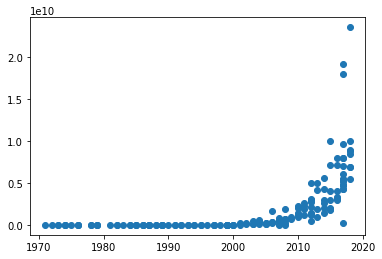

In [0]:
plt.scatter(X, y))

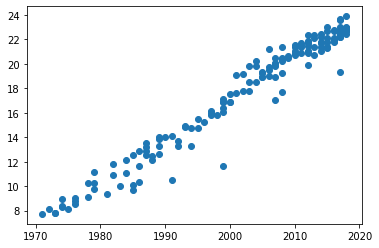

In [0]:
# since we want a linear model, so we take log
y = np.log(y)
plt.scatter(X, y)

In [0]:
# let's center the x data since it is not centered around x.
# We could scale it also but then we have to trainsform it back later since after
# scaling increase of one in x data will no loger represent 1 year
X = X - X.mean()

In [0]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input(shape = (1,)),
#     tf.keras.layers.Dense(1)                                    
# ])

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape = (1,)))

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9),
              loss = "mse")

# learning rate scheduler
def schedule(epoch, learning_rate):
  if epoch > 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, y, callbacks = [scheduler], epochs = 200)

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 0s 242us/sample - loss: 347.6268
Epoch 2/200
162/162 [==============================] - 0s 57us/sample - loss: 315.3716
Epoch 3/200
162/162 [==============================] - 0s 46us/sample - loss: 309.2696
Epoch 4/200
162/162 [==============================] - 0s 47us/sample - loss: 230.4465
Epoch 5/200
162/162 [==============================] - 0s 47us/sample - loss: 169.5950
Epoch 6/200
162/162 [==============================] - 0s 46us/sample - loss: 125.9426
Epoch 7/200
162/162 [==============================] - 0s 46us/sample - loss: 92.9985
Epoch 8/200
162/162 [==============================] - 0s 47us/sample - loss: 94.4358
Epoch 9/200
162/162 [==============================] - 0s 48us/sample - loss: 58.9181
Epoch 10/200
162/162 [==============================] - 0s 46us/sample - loss: 39.9456
Epoch 11/200
162/162 [==============================] - 0s 47us/sample - loss: 41.6665
Epoch 12/200
162/162 [==

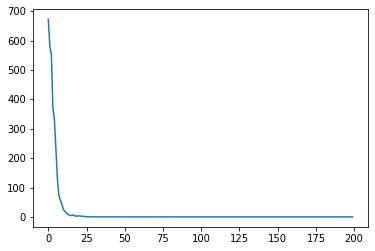

In [0]:
plt.plot(r.history["loss"], label = "loss")

In [0]:
print(model.layers[0].get_weights())

[array([[0.33642134]], dtype=float32), array([17.760763], dtype=float32)]


# Making prediction

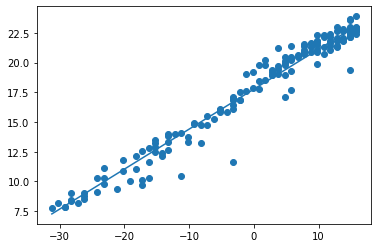

In [0]:
pred = model.predict(X).flatten()
plt.scatter(X, y)
plt.plot(X, pred)

# Saving Model and Loading Model

In [0]:
model.save("linear_model.h5")

In [0]:
!ls

linear_model.h5  moore.csv  sample_data


In [0]:
loaded_model = tf.keras.models.load_model("linear_model.h5")
loaded_model.layers[0].get_weights()

[array([[0.34423864]], dtype=float32), array([17.752062], dtype=float32)]